# Classification Model Comparison

The purpose of this notebook is to determine which model performs best on our human labeled data. 

The overall best model will be the one with the best score with the least overfitting. 

In [8]:
import pickle

import pandas as pd
import numpy as np

from sklearn.metrics import classification_report

from yellowbrick.classifier import ConfusionMatrix, ROCAUC

import matplotlib.pyplot as plt
%matplotlib inline

# Model Import

In [2]:
with open("../models/rf_classifier_v1.pkl", "rb") as model:
    # Original rf classifier
    rf_model = pickle.load(model)
    
with open("../models/rf_classifier_v2_normalized.pkl", "rb") as model:
    # improved rf classifier - trained on larged labeled data set
    rf_v2_classifier = pickle.load(model)
    
with open("../models/rf_classifier_v3_normalized_714.pkl", "rb") as model:
    # Same params as v2, different random state with improved accuracy 
    rf_v3_classifier = pickle.load(model)    
    
with open("../models/rf_classifier_v4_732.pkl", "rb") as model:
    # Same params as v2, different random state with improved accuracy 
    rf_v4_classifier = pickle.load(model)    
    
with open("../models/xg_model_semisupervised_v2.pkl", "rb") as model:
    # semisupervised model, trained on user labeled data
    xg_classifier = pickle.load(model)

In [12]:
models = [
    ("rf_model", rf_model),
    ("rf_v2_classifier", rf_v2_classifier),
    ("rf_v3_classifier", rf_v3_classifier),
    ("rf_v4_classifier", rf_v4_classifier),
    ("xg_classifier", xg_classifier)
]

# Data Import

The data imported here has all been hand labeled (no synthetic data)

In [3]:
labeled_df = pd.read_csv("../data/user_labeled/final_labeled.csv")

X = labeled_df.drop(["node", "label", "similarity_rank"], axis=1).dropna()
y = labeled_df.label

# Model Comparison

In [5]:
y_preds_mod_1 = rf_model.predict(X)
y_preds_mod_v2 = rf_v2_classifier.predict(X)
y_preds_mod_v3 = rf_v3_classifier.predict(X)
y_preds_mod_v4 = rf_v4_classifier.predict(X)
y_preds_mod_2 = xg_classifier.predict(X)

print("MODEL 1:\n", classification_report(y, y_preds_mod_1), "\n\n")
print("MODEL 2:\n", classification_report(y, y_preds_mod_v2), "\n\n")
print("MODEL 3:\n", classification_report(y, y_preds_mod_v3), "\n\n")
print("MODEL 4:\n", classification_report(y, y_preds_mod_v4), "\n\n")
print("MODEL 5 (XG):\n", classification_report(y, y_preds_mod_2))

MODEL 1:
               precision    recall  f1-score   support

       after       0.49      1.00      0.66       137
      before       0.00      0.00      0.00       140

    accuracy                           0.49       277
   macro avg       0.25      0.50      0.33       277
weighted avg       0.24      0.49      0.33       277
 


MODEL 2:
               precision    recall  f1-score   support

       after       0.72      0.71      0.71       137
      before       0.72      0.73      0.72       140

    accuracy                           0.72       277
   macro avg       0.72      0.72      0.72       277
weighted avg       0.72      0.72      0.72       277
 


MODEL 3:
               precision    recall  f1-score   support

       after       0.74      0.68      0.71       137
      before       0.71      0.77      0.74       140

    accuracy                           0.73       277
   macro avg       0.73      0.73      0.72       277
weighted avg       0.73      0.73     

/home/qdizon/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


rf_model


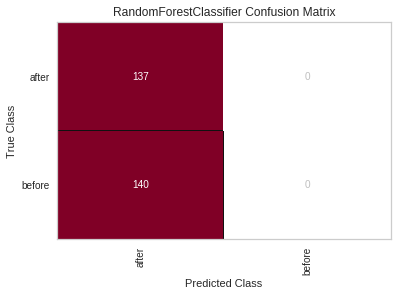

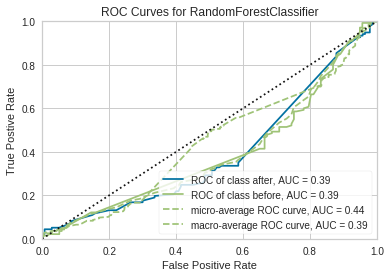

rf_v2_classifier


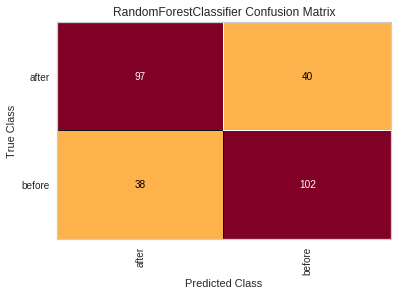

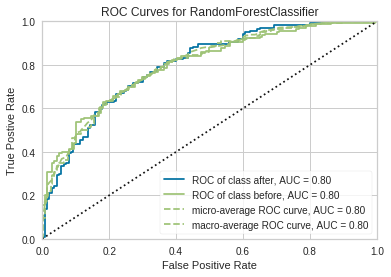

rf_v3_classifier


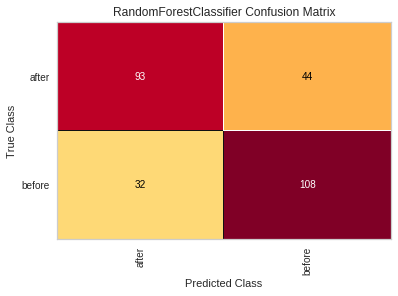

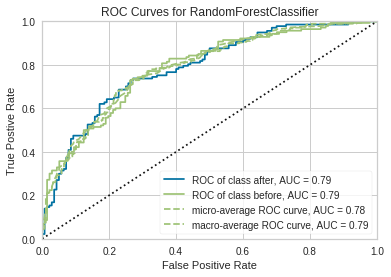

rf_v4_classifier


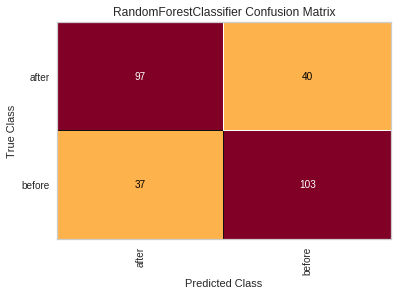

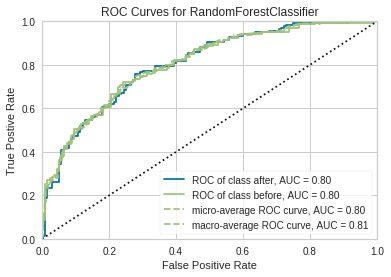

xg_classifier


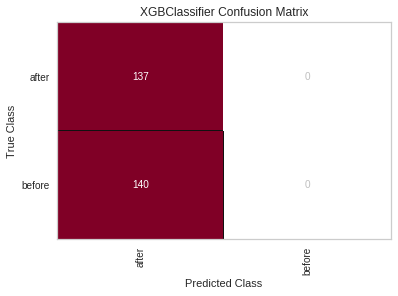

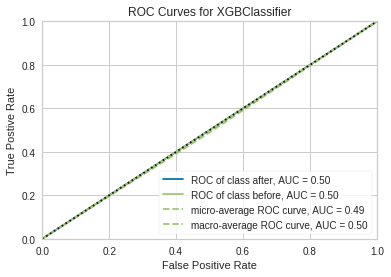

In [20]:
for mod in models:
    model_name = mod[0]
    model = mod[1]
    
    print(model_name)
    
    cm = ConfusionMatrix(model, classes=model.classes_, is_fitted=True)
    vis = ROCAUC(model, classes=model.classes_, is_fitted=True)
    
    fig = plt.figure()
    
    cm.score(X, y)
    cm.poof()
    
    vis.score(X, y)
    vis.poof()

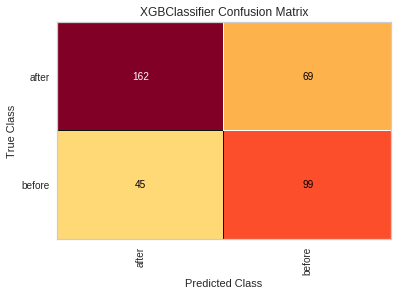

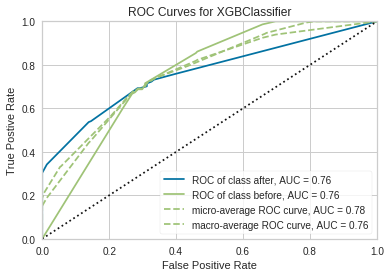

In [24]:
cm2 = ConfusionMatrix(xg_model, classes=xg_model.classes_, is_fitted=True)
vis2 = ROCAUC(xg_model, classes=xg_model.classes_, is_fitted=True)

cm2.score(X, y)
cm2.poof()

vis2.score(X, y)
vis2.poof()

___

Based on the observed results, it appears that the first model (random forest) trained on only the hand labeled data has better results in both performance and lack of overfitting. 